# Nobel prizes

## 1. Loading the data
* <p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [491]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
nobel
nobel.info() #Checking How Many Entries #There are 911 entries in total
print('Data : \n' + str(nobel)) #Viewing the data
missing_entries = nobel[30:881]
inv_entries = len(missing_entries) #Total Number Of Invisible Entries
print(f'\nOut of 911 entries on the dataset, {(inv_entries)} of them are not displayed perhaps because of the window size.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB
Data : 
     year    category                       

###### Task One Answers
#### Q : Are There Any Missing Values?, How Many Entries Does The Set Have?
* Yes, 852 of the 911 years are not visible when the data is displayed.
* 911 Entries In Total

## 2. So, who gets the Nobel Prize?
* <p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [64]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
prizes_1901_to_2016 = nobel.prize.count()
print(f'\nIn total {prizes_1901_to_2016} were given out between the years 1901 until 2016 : ')

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
males = nobel[nobel.sex == 'Male']
males_tot = len(males)
print(f'Total Number Of Male Laureates(1901-2016) : {males_tot}')

females = nobel[nobel.sex == 'Female']
females_tot = len(females)
print(f'Total Number Of Female Laureates(1901-2016) : {females_tot} \n')

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
print('__The Top Ten Countries (1901 to 2016)__ : ')
countries = nobel.birth_country
top_nations = countries.value_counts() #counting how many times each nation won
top10 = top10.head(10)
print(top10)



In total 911 were given out between the years 1901 until 2016 : 
Total Number Of Male Laureates(1901-2016) : 836
Total Number Of Female Laureates(1901-2016) : 49 

__The Top Ten Countries (1901 to 2016)__ : 
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


###### Task Two Answers
Q : Which countries win most often?

A : USA(259), UK(85), Germany(61), France(51), Sweden(29), Japan(24), Netherlands(18), Canada(18), Italy(17), Russia(17).

## 3. USA dominance
* <p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [502]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country == 'United States of America'
nobel['decade'] = (np.floor(nobel.year / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False).usa_born_winner.mean()


# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


#### Task Three Answer

* The USA  started to climb the ranks from around 1910 then took over fully in 1920 unti their decline at the birth of this centrury.

## 4. USA dominance, visualized
* <p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

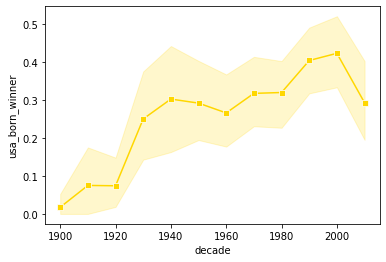

In [505]:
#using seaborn, plot the proportion of US winners by decade
graph = sns.lineplot(x = nobel.decade, y = nobel.usa_born_winner, marker = 's', color = 'gold')


###### Task Three Answers

Q : What can you conclude from the graph?


A : The USA started dominating over Europe from the 1920, but started to decline around Y2K.


## 5. What is the gender of a typical Nobel Prize winner?
* <p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

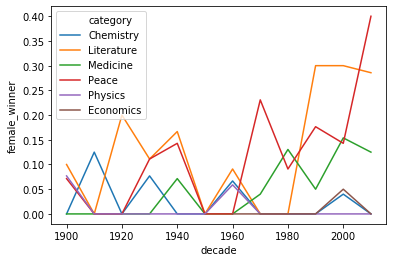

In [295]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel.sex == "Female"
prop_female_winners = nobel.groupby(["decade", "category"] ,as_index = False)["female_winner"].mean()
prop_female_winners

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
female_graph = sns.lineplot(x = "decade", y = "female_winner",hue = "category", data = prop_female_winners)

#### Task Five Answers

##### Plot Interpretation : 
* <p> This Line Labels The Graph and each category has its own color.
          (female_graph = sns.lineplot(x = "decade", y = "female_winner",hue = "category", data = prop_female_winners))
* The females won more Literature Prizes in the early 1910s to 1920, what also happened in the '20s was an increase in the Peace category.
* For Chemistry they won in the earlier times(Marie Curie Era) and it peaked at 1910(decline ever since till 2016)
* For Medicine the numbers increased in the 1960s(Perhaps due to the Hippy Movement In The States or The Civil Rights Movement.)
* For Physics and Economics The Men Are Dominating .<p>


## 6. The first woman to win the Nobel Prize
* <p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [490]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
females.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,Ellipsis


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [508]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
laureates = nobel.full_name
repeat_laureates = laureates.value_counts()
print('Laureate                            ' + '                                             Prizes')
repeat_laureates.head(7)


Laureates                                                                         Prizes


Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Antony Hewish                                                                        1
Name: full_name, dtype: int64

###### Task Three Answers

Q : How many people have received 2 or more prizes?


A : Six people have won the Nobel Prize more than once.

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [440]:
# Converting birth_date from String to datetime
from datetime import datetime as dt
nobel['birth_date'] = pd.to_datetime(nobel.birth_date)
#print(nobel.birth_date)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel.year - nobel.birth_date.dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
mean_age = np.mean(nobel.age)
print(f'The Mean Age Is : {round(mean_age)} Years.')
stand_viation = np.std(nobel.age)
print(f'A Standard Deviation Of {round(stand_viation, 2)}.')
median_age = nobel.age.median()
print(f'The Median Age Is : {round(median_age)} Overall.')


The Mean Age Is : 59 Years.
A Standard Deviation Of 12.39.
The Median Age Is : 60 Overall.


## 9. Age differences between prize categories


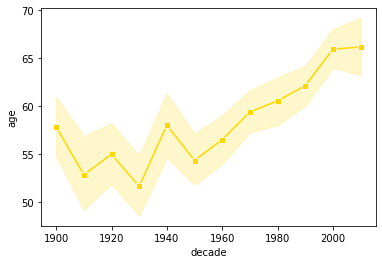

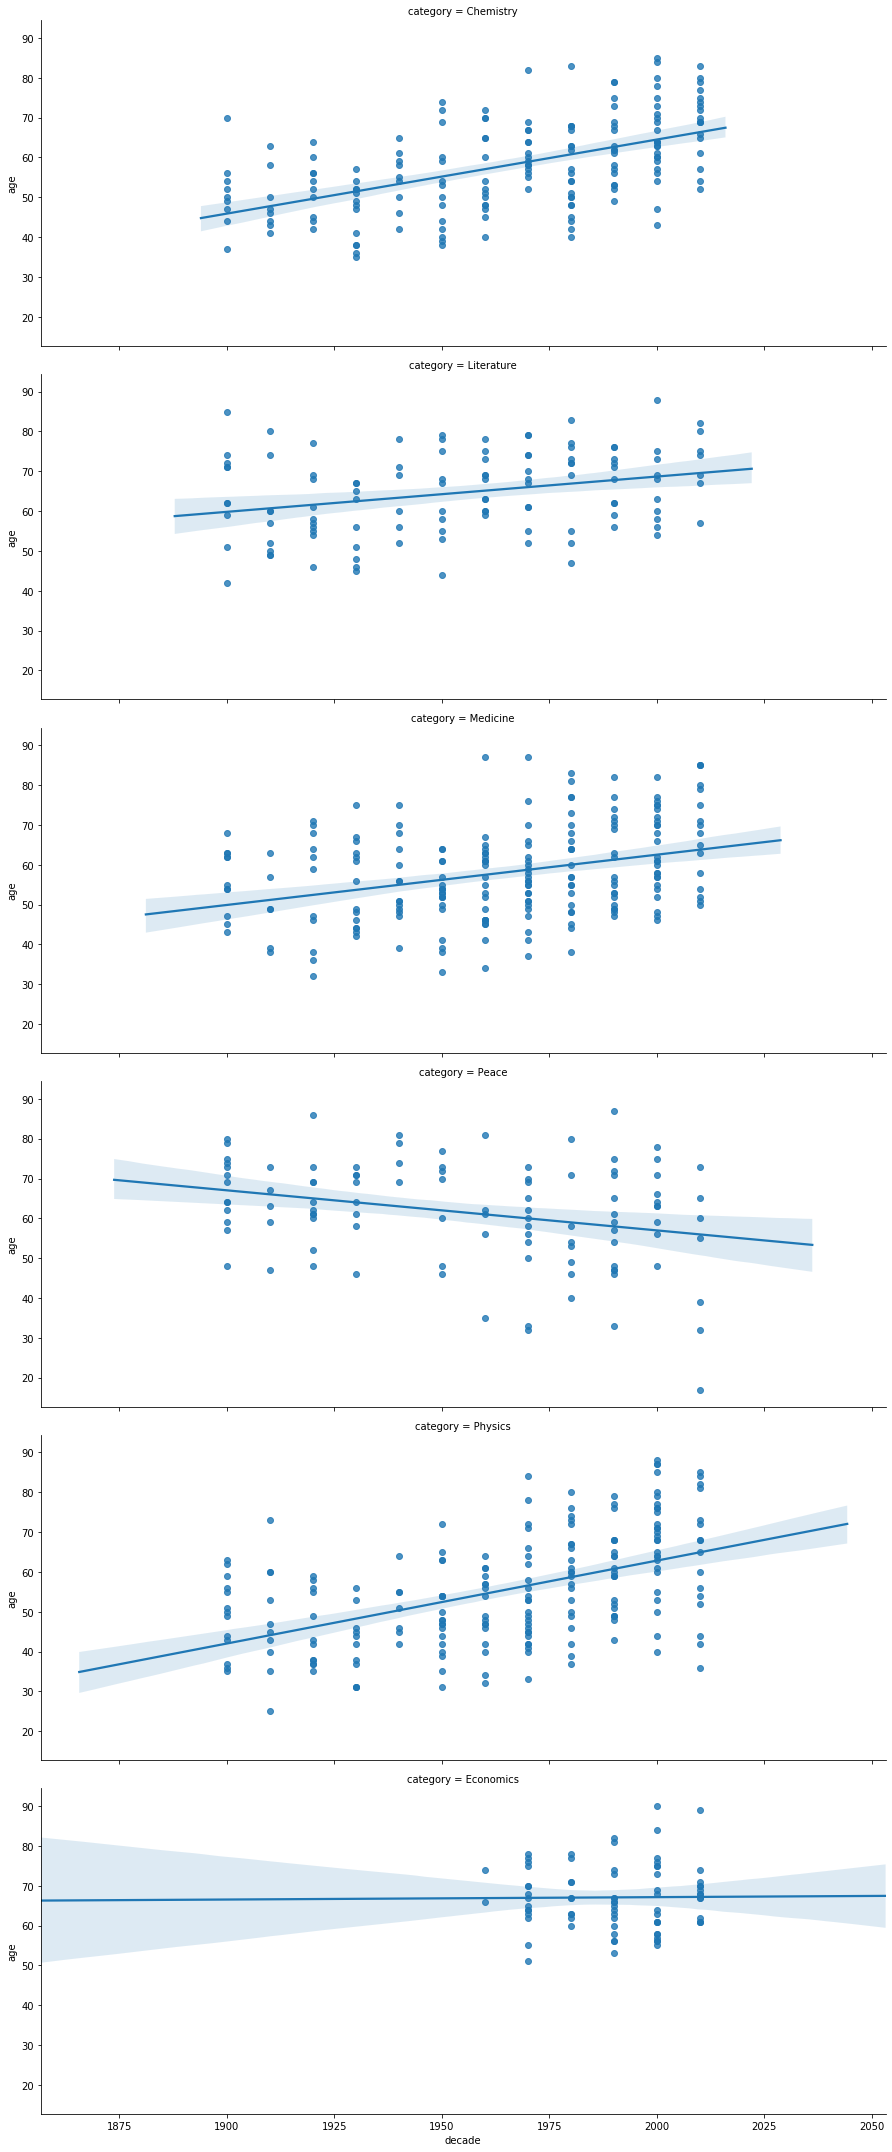

In [483]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
age_graph = sns.lineplot(x = nobel.decade, y = nobel.age, marker = 's', color = 'GOLD')

# Plot the age of nobel candidates by decade and prize category
prize_graph = sns.lmplot(x = 'decade', y = 'age', row = 'category', data = nobel, aspect = 2.5)

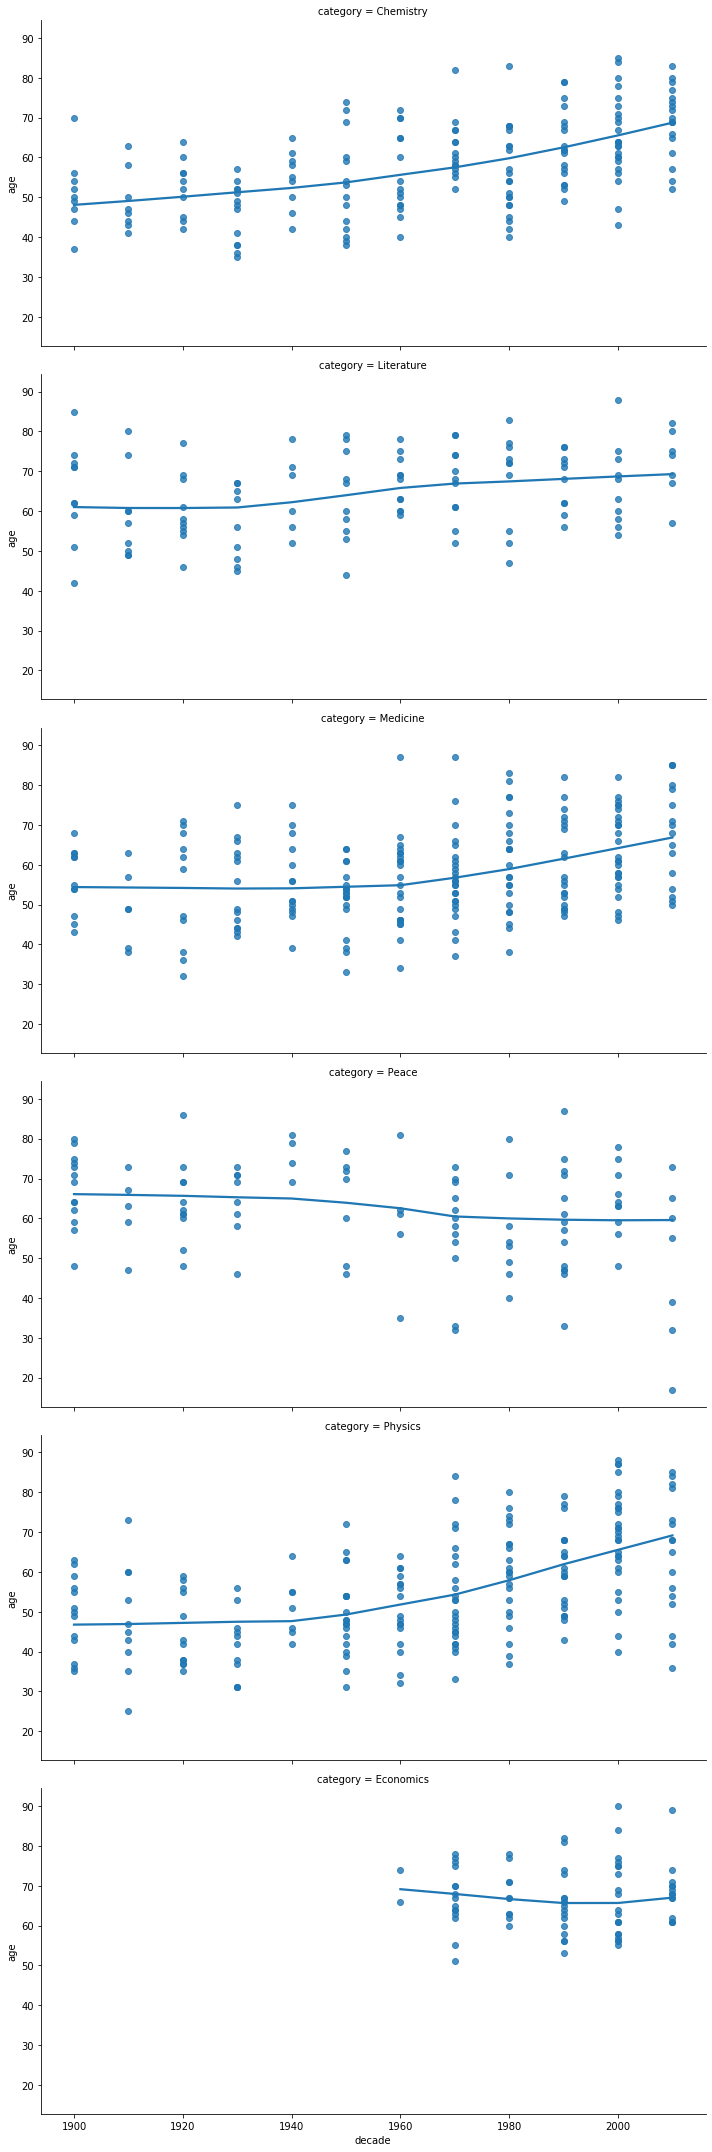

In [488]:
# Plot the age of nobel candidates by decade and prize category
prize_graph = sns.lmplot(x = 'decade', y = 'age', row = 'category', data = nobel, lowess = True, aspect = 2)

#### Task Nine Answers
Q : What can you conclude about the age at which people win different types of Nobel Prizes?
    

A : The Age Is Increasing, Probably Because Discoveries Are Harder To Make, Especially In The Science Fields.
    For Peace Though The Age Is Dropping Mainly Because A Lot Of Philantropists Are The Young Billionaires Like Steve Gates And Others Who Are Giving Away Money To Charities,It Means Young People Are More Humanitarian Than Ever Before. :)

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [489]:
youngest = nobel.age.min()
print(f'The Youngest Laureate Is {youngest} Years Old.')
oldest = nobel.oldest = nobel.age.max()
print(f'The Oldest Laureate Is {oldest} Years Old.')

The Youngest Laureate Is 17.0 Years Old.
The Oldest Laureate Is 90.0 Years Old.


## Congratulations! You've reached the end of the challenge!